## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/mohansacharya/graduate-admissions

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre as chances de admissão ao programa de mestrado de uma universidade americana. O conjunto de dados contém vários parâmetros que são considerados importantes durante a aplicação de programas de mestrado.

Este conjunto de dados é inspirado no conjunto de dados de graduação da UCLA. As pontuações dos testes e GPA estão no formato mais antigo. O conjunto de dados é propriedade de Mohan S Acharya.</p>

Os parâmetros incluídos são: 

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>GRE_Score</b> - General Test Scores (out of 340)</li>
    <li><b>TOEFL_Score</b> - Test of English as a Foreign Language (out of 120)</li>
    <li><b>University_Rating</b> - Ranking of the University (out of 5)</li>
    <li><b>SOP</b> - Statement of Purpose (out of 5)</li>
    <li><b>LOR</b> - Letter of Recommendation Strength (out of 5)</li>
    <li><b>CGPA</b> - Cumulative Grade Points Average (out of 10)</li>
    <li><b>Research</b> - Research Experience (0 for no and 1 for yes)</li>
    <li><b>Chance_of_Admit</b> - Chance of Admission (between 0 and 1)</li>
</ul>

#Importando os Dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_palette('Accent')
sns.set_style('darkgrid')

In [3]:
adm = pd.read_csv('Admission_Predict_1.csv')
adm.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
mapa = {
    'Serial No.':'Serial_No',
    'GRE Score':'GRE_Score',
    'TOEFL Score':'TOEFL_Score',
    'University Rating':'University_Rating',
    'Admit ':'Chance_of_Admit'
}
adm = adm.rename(columns=mapa)
adm

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
adm.shape

(500, 9)

#Análises Preliminares

In [6]:
adm.describe().round()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,250.0,316.0,107.0,3.0,3.0,3.0,9.0,1.0,1.0
std,144.0,11.0,6.0,1.0,1.0,1.0,1.0,0.0,0.0
min,1.0,290.0,92.0,1.0,1.0,1.0,7.0,0.0,0.0
25%,126.0,308.0,103.0,2.0,2.0,3.0,8.0,0.0,1.0
50%,250.0,317.0,107.0,3.0,4.0,4.0,9.0,1.0,1.0
75%,375.0,325.0,112.0,4.0,4.0,4.0,9.0,1.0,1.0
max,500.0,340.0,120.0,5.0,5.0,5.0,10.0,1.0,1.0


In [7]:
adm.head()


,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


##Análise de Correlação

In [8]:
adm.corr()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial_No,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE_Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


##Análise Gráfica

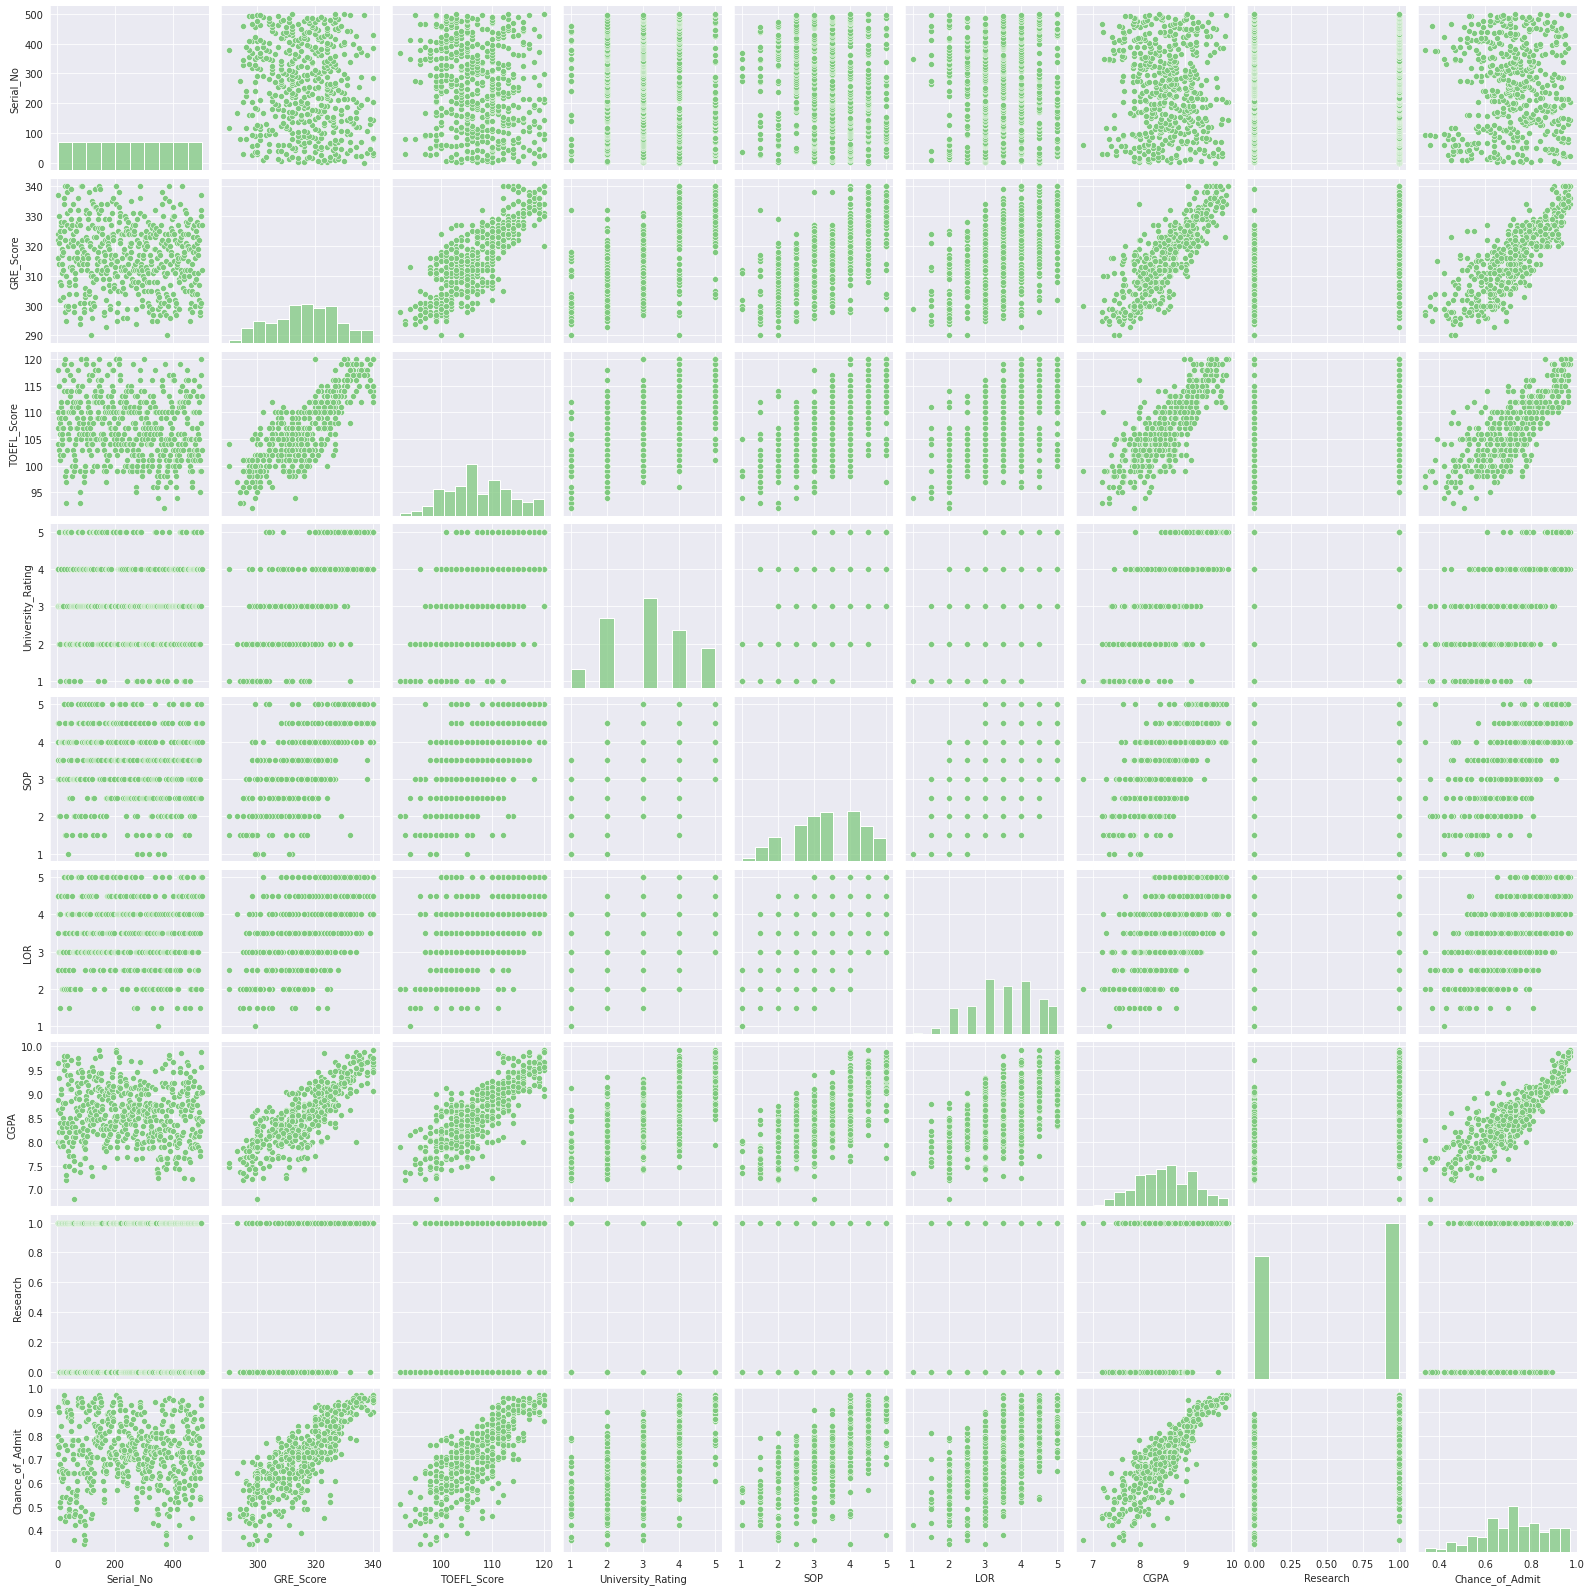

In [9]:
ax = sns.pairplot(data = adm)
ax

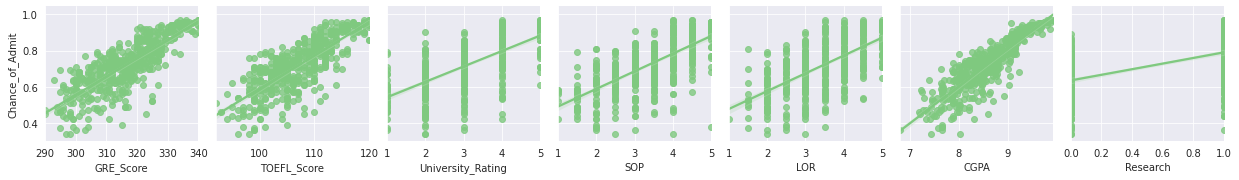

In [10]:
ax = sns.pairplot(adm, y_vars='Chance_of_Admit', x_vars=['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research'],kind='reg')
ax

Text(0.5, 1.0, 'Chance de Admissão')

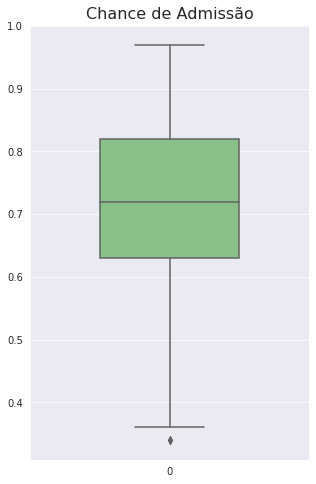

In [11]:
ax = sns.boxplot(data = adm['Chance_of_Admit'],orient='v',width=0.5)
ax.figure.set_size_inches(5,8)
ax.set_title('Chance de Admissão',fontsize=16)

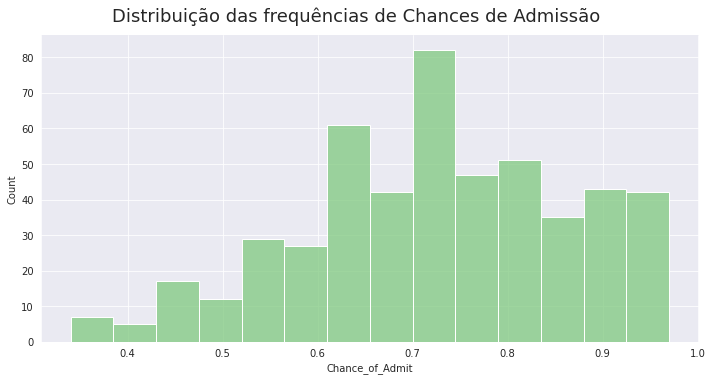

In [64]:
ax = sns.displot(adm['Chance_of_Admit'],aspect=2,legend=False)
ax.fig.suptitle('Distribuição das frequências de Chances de Admissão',y=1.05,fontsize=18)
ax


Text(0.5, 1.0, 'Notas do TOEFL')

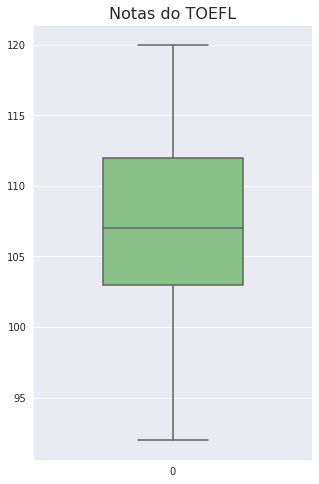

In [61]:
ax = sns.boxplot(data = adm['TOEFL_Score'],orient='v',width=0.5)
ax.figure.set_size_inches(5,8)
ax.set_title('Notas do TOEFL',fontsize=16)


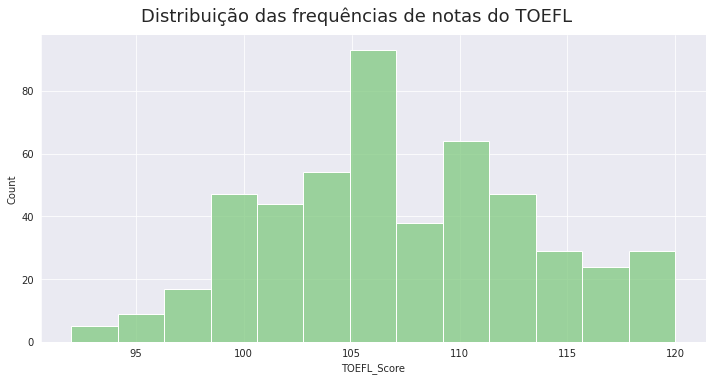

In [60]:
ax = sns.displot(adm['TOEFL_Score'],aspect=2,legend=False)
ax.fig.suptitle('Distribuição das frequências de notas do TOEFL',y=1.05,fontsize=18)
ax

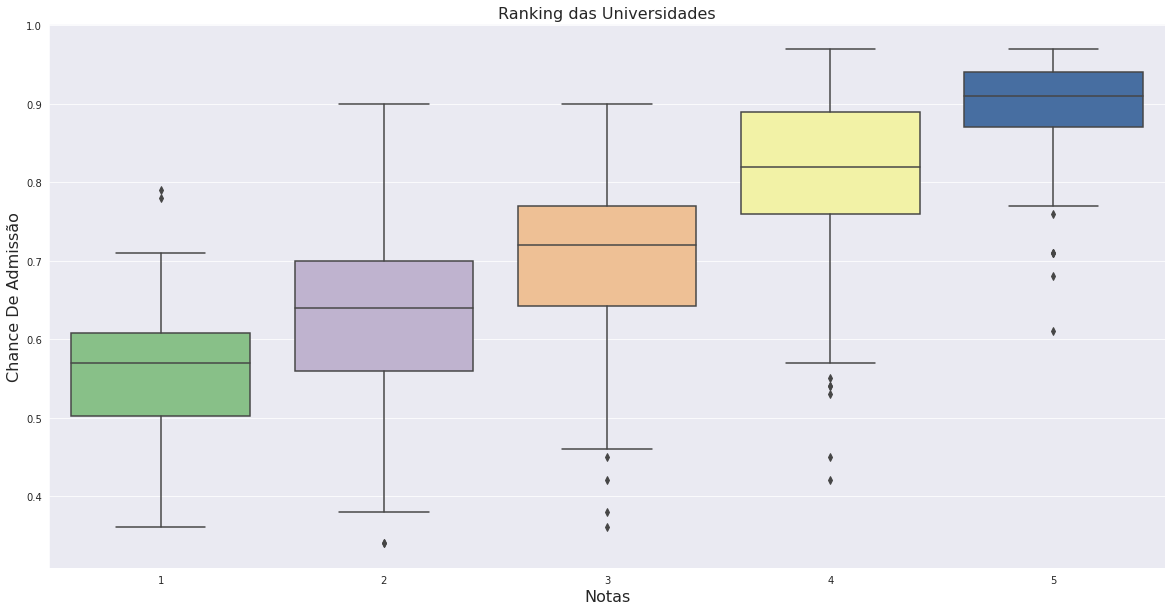

In [15]:
ax = sns.boxplot(x='University_Rating',y='Chance_of_Admit', data=adm)
ax.figure.set_size_inches(20,10)
ax.set_title('Ranking das Universidades',fontsize=16)
ax.set_ylabel('Chance De Admissão', fontsize=16)
ax.set_xlabel('Notas', fontsize=16)
ax

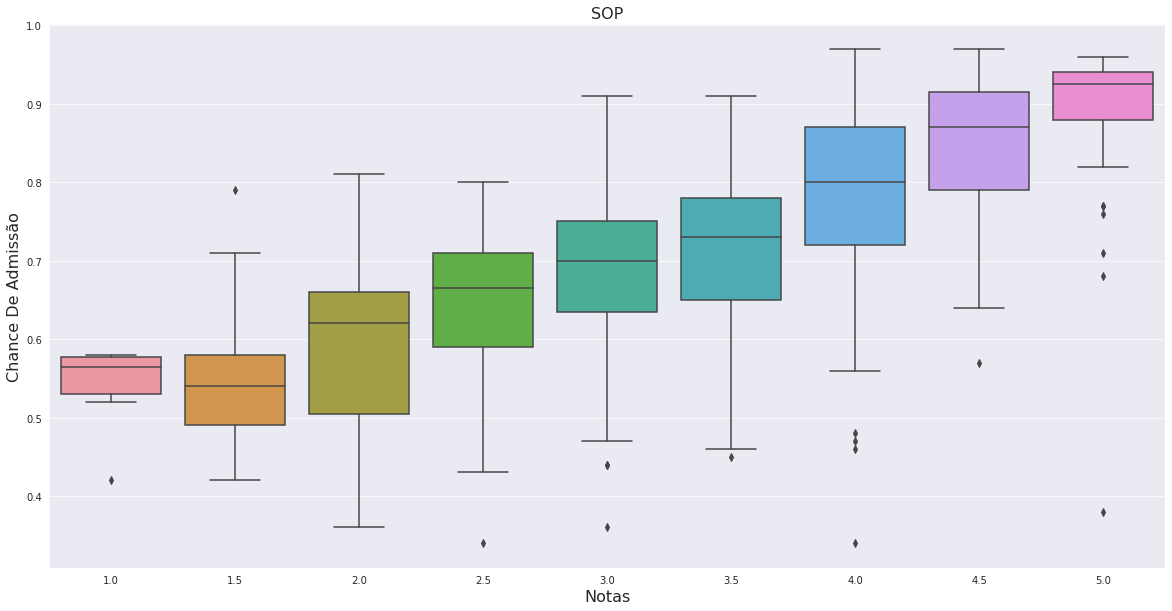

In [16]:
ax = sns.boxplot(x='SOP',y='Chance_of_Admit',data=adm)
ax.figure.set_size_inches(20,10)
ax.set_title('SOP',fontsize=16)
ax.set_ylabel('Chance De Admissão', fontsize=16)
ax.set_xlabel('Notas', fontsize=16)
ax

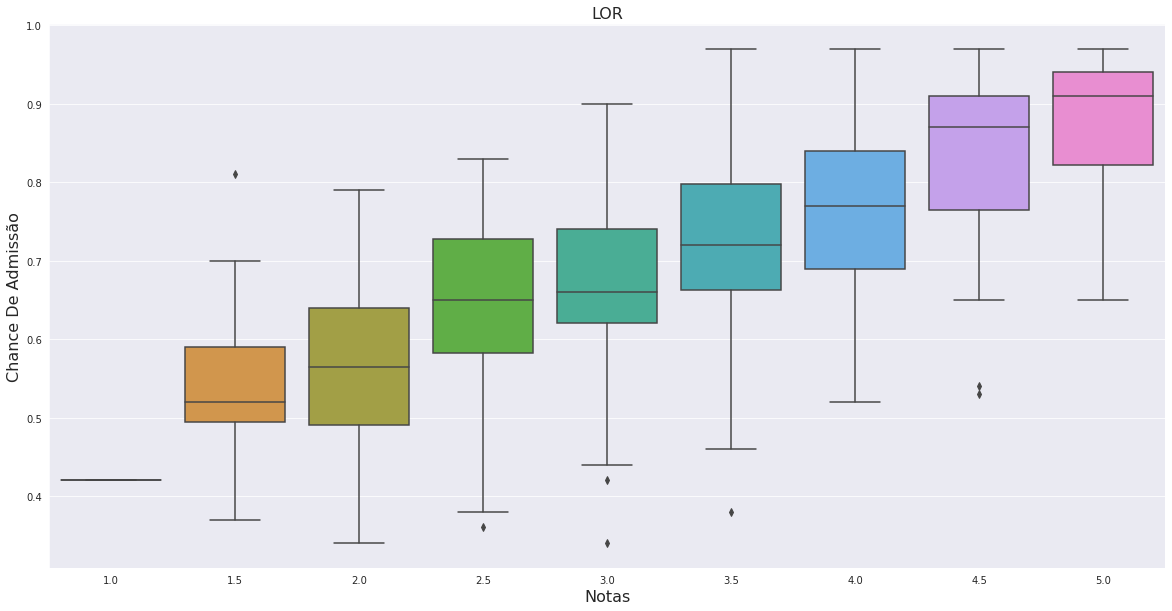

In [17]:
ax = sns.boxplot(x='LOR',y='Chance_of_Admit',data=adm)
ax.figure.set_size_inches(20,10)
ax.set_title('LOR',fontsize=16)
ax.set_ylabel('Chance De Admissão', fontsize=16)
ax.set_xlabel('Notas', fontsize=16)
ax

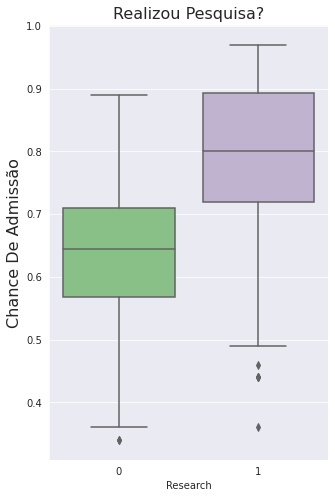

In [18]:
ax = sns.boxplot(x='Research',y='Chance_of_Admit',data=adm)
ax.figure.set_size_inches(20,10)
ax.figure.set_size_inches(5,8)
ax.set_ylabel('Chance De Admissão', fontsize=16)
ax.set_title('Realizou Pesquisa?',fontsize=16)
ax

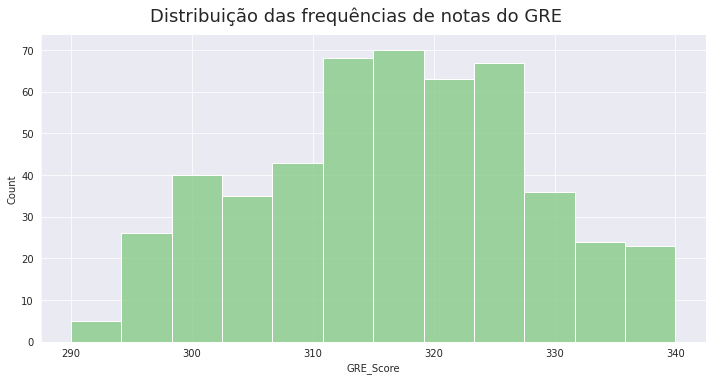

In [59]:
ax = sns.displot(adm['GRE_Score'],aspect=2,legend=False)
ax.fig.suptitle('Distribuição das frequências de notas do GRE',y=1.05,fontsize=18)
ax


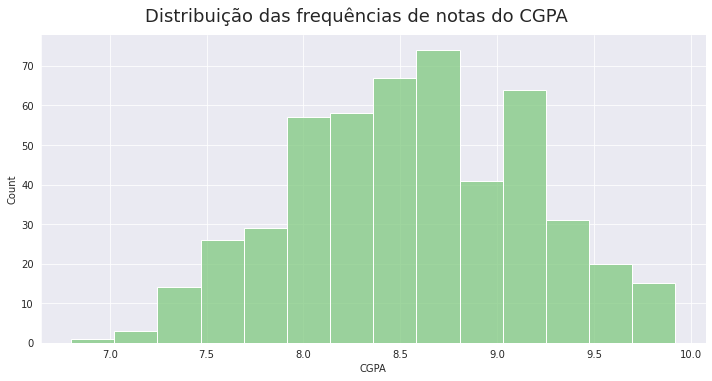

In [58]:
ax = sns.displot(adm['CGPA'],aspect=2,legend=False)
ax.fig.suptitle('Distribuição das frequências de notas do CGPA',y=1.05,fontsize=18)
ax

#Estimando o modelo de regressão para a Admissão

In [21]:
from sklearn.model_selection import train_test_split

y= adm['Chance_of_Admit']
X=adm[['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=20)

In [22]:
X_train.shape

(350, 7)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

modelo = LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##Coeficiente de Determinação R²

In [24]:
print('R² = {}'.format(modelo.score(X_train,y_train).round(2)))

R² = 0.84


##Obtendo Previsões

In [25]:
y_previsto = modelo.predict(X_test)
print('R² = %s'% metrics.r2_score(y_test,y_previsto).round(2))

R² = 0.78


In [26]:
entrada = X_test[0:1]
entrada

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
285,331,116,5,4.0,4.0,9.26,1


In [27]:
entrada_porcentagem = modelo.predict(entrada)[0]*100
print('A Chance de Admissão é de {} %'.format(entrada_porcentagem.round(2)))

A Chance de Admissão é de 88.57 %


##Coeficientes do Modelo

In [28]:
index = ['Intercepto','GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research']
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_),index = index, columns=['Parâmetros'])

,Parâmetros
Intercepto,-1.160710
GRE_Score,0.001546
TOEFL_Score,0.002601
University_Rating,0.009138
SOP,0.007235
LOR,0.015829
CGPA,0.116258
Research,0.018428


#Análise Gráfica das Previsões do Modelo

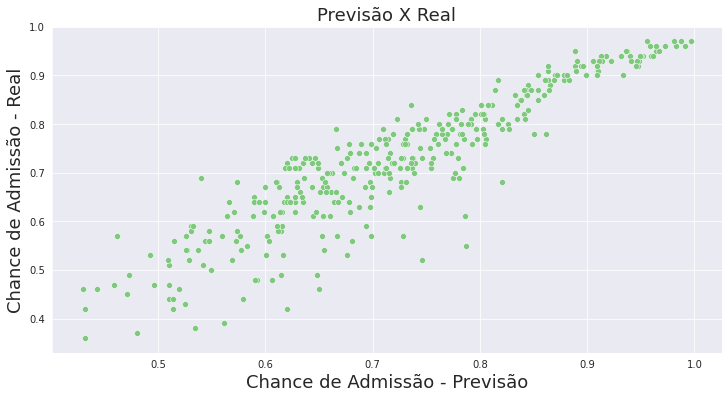

In [29]:
y_previsto_train = modelo.predict(X_train)

ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Real',fontsize=18)
ax.set_xlabel('Chance de Admissão - Previsão',fontsize=18)
ax.set_ylabel('Chance de Admissão - Real',fontsize=18)
ax

##Resíduo


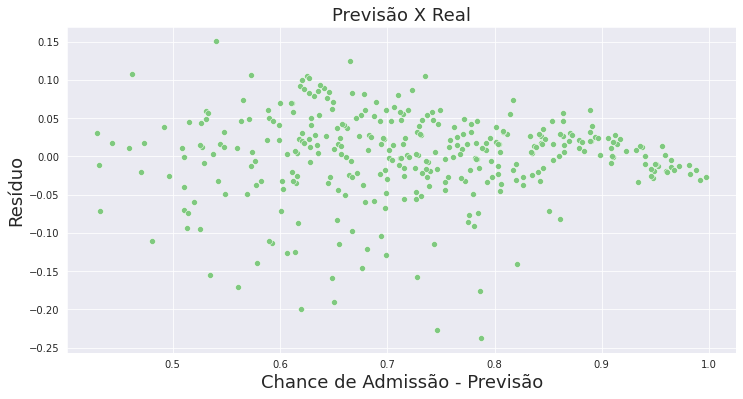

In [35]:
residuo = y_train - y_previsto_train
ax = sns.scatterplot(x=y_previsto_train,y=residuo)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Real',fontsize=18)
ax.set_xlabel('Chance de Admissão - Previsão',fontsize=18)
ax.set_ylabel('Resíduo',fontsize=18)
ax

##Erro Quadrático Médio

In [30]:
EQM = metrics.mean_squared_error(y_test,y_previsto).round(4)
REQM = np.sqrt(metrics.mean_squared_error(y_test,y_previsto)).round(4)
R2 = metrics.r2_score(y_test,y_previsto).round(4)

pd.DataFrame([EQM,REQM,R2],['EQM','REQM','R²'],columns=['Métricas'])

,Métricas
EQM,0.0045
REQM,0.0670
R²,0.7818


#Simulador

In [31]:
from ipywidgets import widgets,HBox,VBox
from IPython.display import display

GRE_Score = widgets.Text(description='GRE Score')
TOEFL_Score = widgets.Text(description='TOEFL Score')
University_Rating = widgets.Text(description='Univ. Rating')
SOP = widgets.Text(description='SOP')
LOR = widgets.Text(description='LOR')
CGPA = widgets.Text(description='CGPA')
Research = widgets.Text(description='Research?')

botao = widgets.Button(description='Simular')

left = VBox([GRE_Score,TOEFL_Score,LOR,SOP])
right = VBox([University_Rating,CGPA,Research])
inputs = HBox([left,right])

def simulador(sender):
  entrada = [[
              float(GRE_Score.value if GRE_Score.value else 0),
              float(TOEFL_Score.value if TOEFL_Score.value else 0),
              float(University_Rating.value if University_Rating.value else 0),
              float(SOP.value if SOP.value else 0),
              float(LOR.value if LOR.value else 0),
              float(CGPA.value if CGPA.value else 0),
              float(University_Rating.value if University_Rating.value else 0)
  ]]
  
  print('A Chance de Admissão é de {0:.2f} %'.format((modelo.predict(entrada)*100)[0]))

botao.on_click(simulador)

In [32]:
display(inputs,botao)

Button(description='Simular', style=ButtonStyle())

A Chance de Admissão é de 74.71 %


#Salvando o Modelo

In [33]:
import pickle

output = open('modelo_admissao_universidade','wb')
pickle.dump(modelo,output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_admissao_universidade','rb')
lm_new = pickle.load(modelo)
modelo.close()

GRE_Score = 305
TOEFL_Score =  100
University_Rating = 4
LOR = 4.5
SOP = 4
CGPA = 9.5
Research = 1

entrada = [[GRE_Score, TOEFL_Score, University_Rating, LOR, SOP, CGPA,Research]]

print('A Chance de Admissão é de {0:.2f} %'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
A Chance de Admissão é de 88.59 %
```